In [ ]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
from nltk.corpus import stopwords

import plotly.express as px

from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

from nltk.tokenize import TweetTokenizer
import pandas as pd
import nltk
from pickle import load
from pickle import dump

#!pip install WordCloud
# nltk.download('stopwords') 
# nltk.download('wordnet')
# nltk.download('punk')

In [2]:
## RAW TEXT

In [4]:
#reading the data from the worksheet 
data_df=pd.read_csv("static/Data/Data_project-3 - Sheet1.csv", dtype={"title":"string"})
data_df

,Sentiment,title,Unnamed: 2,time
0,2,Assuming to be true that Putin is manipulating...,0,2016-12-30 23:21:38
1,0,My unpleasant experience from a Hillary suppor...,1,2016-12-30 16:47:07
2,2,Given the recent findings about Trump illegall...,2,2016-12-30 14:50:26
3,2,I'll be on Fox News Channel at 1pm (as a Dem S...,3,2016-12-30 14:27:26
4,2,"Russia is unashamedly Authoritarian, Christian...",4,2016-12-30 14:14:00
...,...,...,...,...
1717,3,https://www.washingtonpost.com/video/politics/...,671,2021-01-03 20:14:45
1718,3,Cruz loves trump &amp; hates democracy,672,2021-01-03 15:34:23
1719,3,The Trump Project,673,2021-01-03 13:45:19
1720,0,How would US political system handle Trump 2.0?,675,2021-01-03 11:14:13


In [5]:
#looking for NA values and data type
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiment   1722 non-null   int64 
 1   title       1721 non-null   string
 2   Unnamed: 2  1722 non-null   int64 
 3   time        1722 non-null   object
dtypes: int64(2), object(1), string(1)
memory usage: 53.9+ KB


In [6]:
#dropping not needed columns.
data_df=data_df.drop("Unnamed: 2", axis=1)
data_df=data_df.drop(1458)

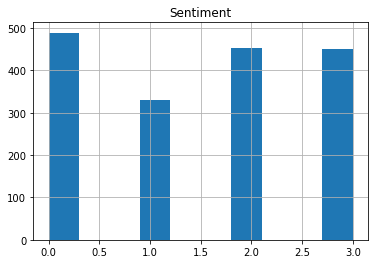

In [15]:
#visualizing the data 
hist = data_df.hist(bins=10)
plt.savefig('static/images/neg-pos.png')

In [ ]:
## TOKENIZATION

In [17]:
sentiment_df=data_df.copy()

In [ ]:
#sentiment_df['title_length']=sentiment_df.apply(lambda row: len(row['title']), axis=1)

In [ ]:
#sentiment_df['tokenize']=sentiment_df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

In [18]:
sentiment_df

,Sentiment,title,time
0,2,Assuming to be true that Putin is manipulating...,2016-12-30 23:21:38
1,0,My unpleasant experience from a Hillary suppor...,2016-12-30 16:47:07
2,2,Given the recent findings about Trump illegall...,2016-12-30 14:50:26
3,2,I'll be on Fox News Channel at 1pm (as a Dem S...,2016-12-30 14:27:26
4,2,"Russia is unashamedly Authoritarian, Christian...",2016-12-30 14:14:00
...,...,...,...
1717,3,https://www.washingtonpost.com/video/politics/...,2021-01-03 20:14:45
1718,3,Cruz loves trump &amp; hates democracy,2021-01-03 15:34:23
1719,3,The Trump Project,2021-01-03 13:45:19
1720,0,How would US political system handle Trump 2.0?,2021-01-03 11:14:13


In [ ]:
## STOP WORDS

In [19]:
#seting up the stopwords

STOPWORDS1=["Bernie",",",".","!",":","?","US","U","u","Donal","Obama","GOP","Sander","GOP party","Biden","support","would","Hillary","Clinton","year""would","could","Clinton","administration","vote","election","Donald","President","Trump","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","to"]
STOPWORDS={"trump",",",".","!",":","?","U","u","i", "me", "my", 
           "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
           "yourself", "yourselves", "he", "him", "his", "himself", "she", "her",
           "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", 
           "themselves", "what", "which", "who", "whom", "this", "that", "these", "those",
           "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
           "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
           "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against",
           "between", "into", "through", "during", "before", "after", "above", "below", "to", "from",
           "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once",
           "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
           "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
           "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","to"}

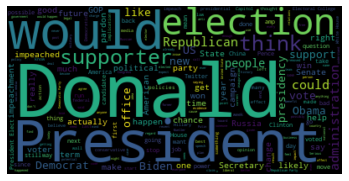

In [21]:
#creating a word claude for the hole data frame

stopwords = set(STOPWORDS)
textt = " ".join(title for title in sentiment_df["title"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('static/images/wordcloudAll.png')
plt.show()

In [22]:
wordCloud_df=sentiment_df.copy()
positive = wordCloud_df[wordCloud_df['Sentiment'] == 1]
negative = wordCloud_df[wordCloud_df['Sentiment'] == 2]
neutral= wordCloud_df[wordCloud_df['Sentiment'] == 0]
drop= wordCloud_df[wordCloud_df['Sentiment'] == 3]

In [23]:
#Positive or in favor of Trump
stopwords = set(STOPWORDS)
pos= " ".join(title for title in positive.title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)

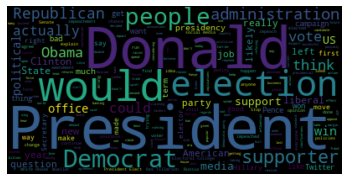

<Figure size 432x288 with 0 Axes>

In [28]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('static/images/wordcloudPositive.png')

In [29]:
#negative or againts Trump
stopwords = set(STOPWORDS)
neg= " ".join(title for title in negative.title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

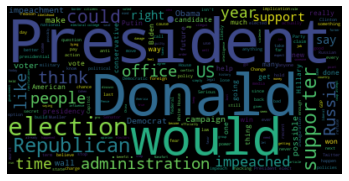

<Figure size 432x288 with 0 Axes>

In [30]:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('static/images/wordcloudNegative.png')

In [31]:
wordCloud_df["Sentiment"]=wordCloud_df['Sentiment'].replace({2 : 'negative'})
wordCloud_df["Sentiment"]=wordCloud_df['Sentiment'].replace({1 : 'positive'})
wordCloud_df["Sentiment"]=wordCloud_df['Sentiment'].replace({0 : 'neutral'})
wordCloud_df["Sentiment"]=wordCloud_df['Sentiment'].replace({3 : 'drop'})
wordCloud_df

,Sentiment,title,time
0,negative,Assuming to be true that Putin is manipulating...,2016-12-30 23:21:38
1,neutral,My unpleasant experience from a Hillary suppor...,2016-12-30 16:47:07
2,negative,Given the recent findings about Trump illegall...,2016-12-30 14:50:26
3,negative,I'll be on Fox News Channel at 1pm (as a Dem S...,2016-12-30 14:27:26
4,negative,"Russia is unashamedly Authoritarian, Christian...",2016-12-30 14:14:00
...,...,...,...
1717,drop,https://www.washingtonpost.com/video/politics/...,2021-01-03 20:14:45
1718,drop,Cruz loves trump &amp; hates democracy,2021-01-03 15:34:23
1719,drop,The Trump Project,2021-01-03 13:45:19
1720,neutral,How would US political system handle Trump 2.0?,2021-01-03 11:14:13


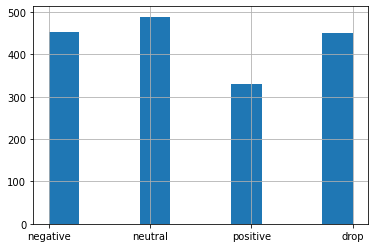

In [33]:
sentiment_hist = wordCloud_df['Sentiment'].hist(bins=10)
sentiment_hist
plt.savefig('static/images/sentiment.png')

In [ ]:
#sentiment_df=sentiment_df.drop(['tokenized','leng'], axis=1)

In [34]:
sentiment_df=sentiment_df[sentiment_df["Sentiment"]!= 3]

In [35]:
sentiment_df

,Sentiment,title,time
0,2,Assuming to be true that Putin is manipulating...,2016-12-30 23:21:38
1,0,My unpleasant experience from a Hillary suppor...,2016-12-30 16:47:07
2,2,Given the recent findings about Trump illegall...,2016-12-30 14:50:26
3,2,I'll be on Fox News Channel at 1pm (as a Dem S...,2016-12-30 14:27:26
4,2,"Russia is unashamedly Authoritarian, Christian...",2016-12-30 14:14:00
...,...,...,...
1714,2,How many people think Trump is a sore loser,2021-01-03 23:37:09
1715,0,TRUMP PRESSURES GA SECRETARY OF STATE TO OVERT...,2021-01-03 22:51:26
1716,0,Trump supporters: How could President Trump lo...,2021-01-03 20:18:47
1720,0,How would US political system handle Trump 2.0?,2021-01-03 11:14:13


In [ ]:
# filtered_sentence2 = []
# for row in sentiment_df["tokenize"]:
#     #print(row)
#     stop_words = STOPWORDS
#     word_tokens=row
#     #print(word_tokens)
#     filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#     filtered_sentence = []
#     filtered_sentence2.append(filtered_sentence)
#     for w in word_tokens:
#         if w not in stop_words:
#             #print(w)
#             filtered_sentence.append(w)
        
#     #print(filtered_sentence)

# #print(filtered_sentence2) 
# sentiment_df['tokenize_filter']=filtered_sentence2
# sentiment_df

In [ ]:
# Model Training

In [ ]:
## TOKENIZATION

In [36]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words=STOPWORDS ,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(sentiment_df['title'])

In [37]:
text_counts.data


array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [ ]:
# ## TF-IDF
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# for x in sentiment_df['tokenize_filter']:
#     X = vectorizer.fit_transform(x)
# print.X.shape

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf=TfidfVectorizer()
# text_tf= tf.fit_transform(sentiment_df['title'])

In [ ]:
# #count of each words per row

# #sentiment_df['word_count']=sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1)


# #print(sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1))
# #{word: sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1).count(word) for word in set(sentiment_df.apply(lambda row: (row['tokenize_filter']), axis=1))}
# count_vector=[]
# for x in sentiment_df['tokenize_filter']:
#     count_vector.append({word: x.count(word) for word in set(x)})
# print(count_vector)

In [38]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, sentiment_df['Sentiment'], test_size=0.3, random_state=1)


In [40]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.44881889763779526


In [41]:
dump(clf, open('model.pkl', 'wb'))
dump(cv, open('vectorizer.pkl', 'wb'))

In [42]:
datalist=sentiment_df["title"].to_list()
datalist.append("Trump is a bad at politics and and and and and and and bad bad Trump politics goodfhg")

text_counts1= cv.transform(datalist)

predicted= clf.predict(text_counts1[-1])
predicted

array([0], dtype=int64)

In [43]:
pd.concat([sentiment_df["title"],pd.Series("Trump is a bad at politics")])
datalist=sentiment_df["title"].to_list()
datalist.append("Trump is a bad at politics")

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.4435695538057743